In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri.csv")


print(data.head())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


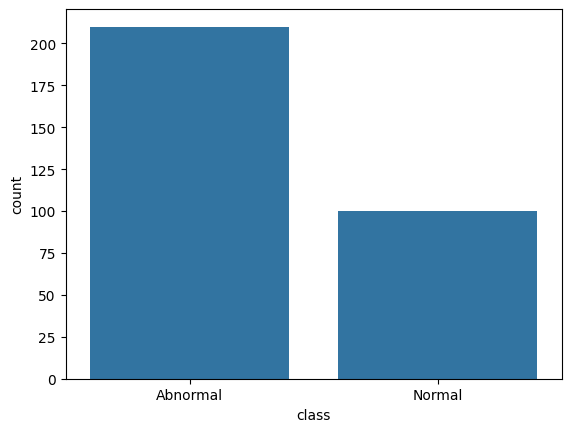

In [16]:
sns.countplot(data, x='class')
plt.show()

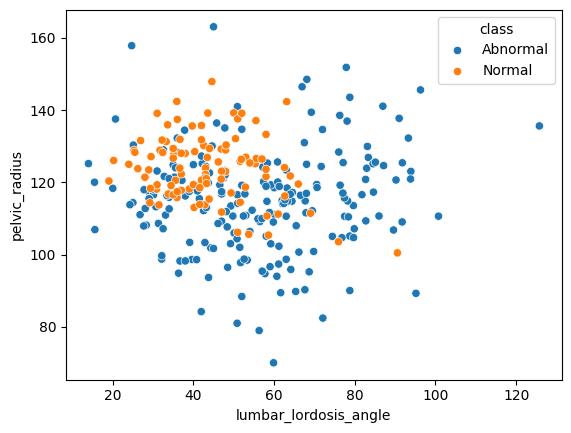

In [17]:
sns.scatterplot(data=data, x='lumbar_lordosis_angle',
                y='pelvic_radius', hue='class')
plt.show()

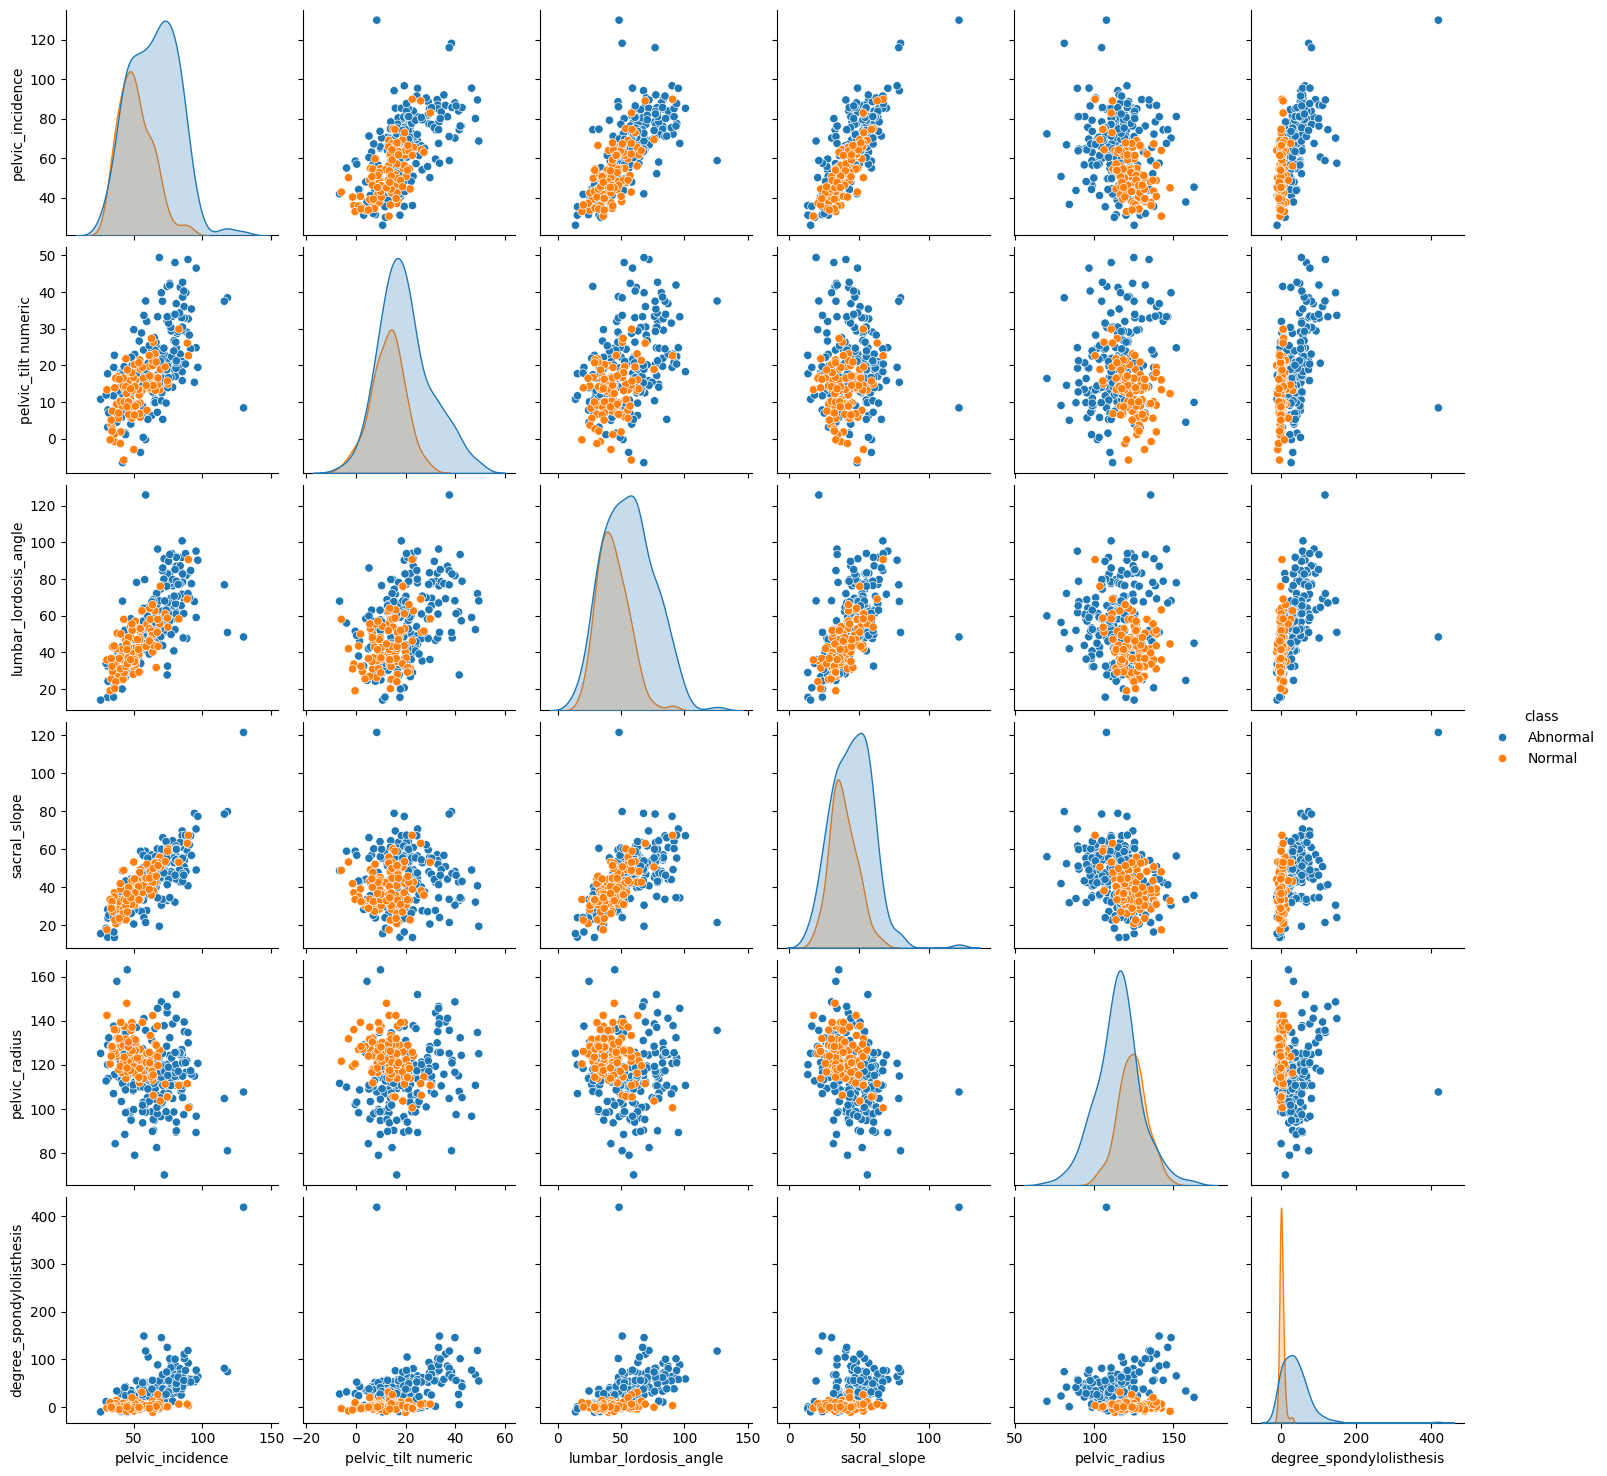

In [18]:
sns.pairplot(data, hue='class')
plt.show()

In [21]:
data['class'] = [1 if each == 'Abnormal' else 0 if each ==
                 'Normal' else each for each in data['class']]
print(data.head())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class  
0      98.672917                 -0.254400      1  
1     114.405425                  4.564259      1  
2     105.985135                 -3.530317      1  
3     101.868495                 11.211523      1  
4     108.168725                  7.918501      1  


In [22]:
x_data = data.drop(['class'], axis=1)
y = data['class'].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Normalizasyon


In [24]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

print(x)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.172453             0.078237               0.117940   
1            0.116655             0.049160               0.083970   
2            0.185964             0.077459               0.142342   
3            0.187046             0.083126               0.128886   
4            0.141459             0.048208               0.091656   
..                ...                  ...                    ...   
305          0.137248             0.057437               0.109539   
306          0.151291             0.073975               0.093758   
307          0.168772             0.078569               0.133213   
308          0.131077             0.045976               0.122535   
309          0.104515             0.037551               0.111032   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0        0.119956       0.255425                  0.025148  
1        0.093236       0.292047                 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((217, 6), (93, 6), (217,), (93,))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('K=3 için doğruluk oranı: ', knn.score(x_test, y_test))


K=3 için doğruluk oranı:  0.8172043010752689
